Notebook #3

# Human Rights Involvement (issue code = HR)

**Link:** https://ourworldindata.org/human-rights 

**Paper Title:** Respect for Human Rights has Improved Over Time: Modeling the Changing Standard of Accountability

**Author:** Christopher J. Fariss. Researcher affiliates with the University of Michigan. His research focuses on the politics and measurement of human rights, discrimination, violence, and repression.

**Author Website:** http://cfariss.com/ 

**Year:** 2014

**Published:** In American Political Science Review / Volume 108 / Issue 02 / May 2014, pp 297-318 DOI: http://dx.doi.org/10.1017/S0003055414000070 (About DOI)

**Published online:** 08 May 2014

**Dataverse:** Developed a Human Rights Score (which is affiliated with Harvard) https://dataverse.harvard.edu/dataverse/HumanRightsScores 




## Load Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import math

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [4]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed.csv', sep=',')

In [5]:
voting_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/Resolution_by_Developed_Voting_Counts.csv', sep=',')

In [6]:
# human rights score data
hr_score_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/input_data/human-rights-scores.csv', sep=',')

## Understanding the data

In [ ]:
# head
hr_score_df.head()

,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,Afghanistan,AFG,1946,0.690479
1,Afghanistan,AFG,1947,0.739823
2,Afghanistan,AFG,1948,0.787035
3,Afghanistan,AFG,1949,0.816707
4,Afghanistan,AFG,1950,0.850675


In [ ]:
hr_score_df.tail()

,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
11712,Zimbabwe,ZWE,2013,-0.832728
11713,Zimbabwe,ZWE,2014,-0.776670
11714,Zimbabwe,ZWE,2015,-0.850764
11715,Zimbabwe,ZWE,2016,-0.883085
11716,Zimbabwe,ZWE,2017,-0.741357


In [ ]:
# info
hr_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11717 entries, 0 to 11716
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11717 non-null  object 
 1   Code                                                            11717 non-null  object 
 2   Year                                                            11717 non-null  int64  
 3   Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)  11717 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 366.3+ KB


In [ ]:
# describe
hr_score_df.describe()

,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
count,11717.000000,11717.000000
mean,1984.779978,0.053388
std,20.440023,1.521246
min,1946.000000,-3.767393
25%,1968.000000,-0.990335
50%,1987.000000,-0.071259
75%,2002.000000,0.961495
max,2017.000000,5.139970


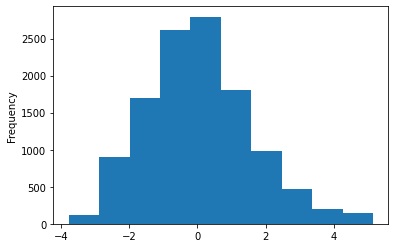

In [ ]:
hr_score_df['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'].plot.hist()
# basically a normal curve

In [ ]:
# columns
hr_score_df.columns

Index(['Entity', 'Code', 'Year',
       'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'],
      dtype='object')

In [ ]:
len(hr_score_df)

11717

In [ ]:
# missing
hr_score_df.isnull().sum()

Entity                                                            0
Code                                                              0
Year                                                              0
Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)    0
dtype: int64

## Merge

In [ ]:
len(hr_score_df['Code'].unique())

201

In [ ]:
len(UN_data_df['Country'].unique())

198

In [ ]:
hr_score_df.columns

Index(['Entity', 'Code', 'Year',
       'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'],
      dtype='object')

In [ ]:
# drop country name column
# we do not need the the 'Entity' column because we will use the 'Code' column for the merge
hr_score_df = hr_score_df.drop('Entity', axis=1)

In [ ]:
# change code to country code
hr_score_df = hr_score_df.rename(columns={'Code':'Country', 'Year': 'year'})

In [ ]:
# merge on code and year 
UN_data_df = pd.merge(UN_data_df, hr_score_df, on=['Country', 'year'], how='left')

In [ ]:
UN_data_df.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377


In [ ]:
UN_data_df.isnull().sum()

Unnamed: 0                                                             0
rcid                                                                   0
ccode                                                                  0
member                                                            329201
vote                                                                   0
Country                                                                0
Countryname                                                            0
year                                                                   0
session                                                                0
abstain                                                             7157
yes                                                                  190
no                                                                 21383
importantvote                                                     135957
date                                               

### Save

In [ ]:
# save the vote_by_developed into a CSV (Resolution_by_Developed_Voting_Counts)
UN_data_df.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR.csv', index = False)

## Upholds_HR Column

### Load

In [ ]:
# human rights score data
hr_score_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
hr_score_df.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377


### Create column

1 = Upholds human rights >= 0

0 = Does not uphold human rights < 0 

In [ ]:
temp = hr_score_df.copy()

In [ ]:
temp['upholds_hr?'] = math.nan

In [ ]:
temp.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,NaN
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,NaN
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,NaN
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,NaN


In [ ]:
temp.loc[temp['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'] >= 0, 'upholds_hr?'] = 1

In [ ]:
temp.loc[temp['Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)'] < 0, 'upholds_hr?'] = 0

In [ ]:
temp.head()

,Unnamed: 0,rcid,ccode,member,vote,Country,Countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,Continent,GDP per capita (current US$),Developed?,Median_GDP,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


In [ ]:
temp.isnull().sum()
# same number of nulls 

Unnamed: 0                                                             0
rcid                                                                   0
ccode                                                                  0
member                                                            329201
vote                                                                   0
Country                                                                0
Countryname                                                            0
year                                                                   0
session                                                                0
abstain                                                             7157
yes                                                                  190
no                                                                 21383
importantvote                                                     135957
date                                               

### Rename all the columns and make them lower case

In [ ]:
# rename column ? and make all of the columns lower case
temp.columns = temp.columns.str.lower()

In [ ]:
temp.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp per capita (current us$),developed?,median_gdp,"human rights score (schnakenberg & fariss, 2014; fariss, 2019)",upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


In [ ]:
# rename two of the columns
# gdp per capita (current us$)
# human rights score (schnakenberg & fariss, 2014; fariss, 2019)
temp = temp.rename(columns={'gdp per capita (current us$)':'gdp_per_capita_(current us$)', 'human rights score (schnakenberg & fariss, 2014; fariss, 2019)' : 'human_rights_score'})

In [ ]:
temp.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


### Save

In [ ]:
# save the vote_by_developed into a CSV (Resolution_by_Developed_Voting_Counts)
temp.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR.csv', index = False)

## Explore Nulls

### Load

In [7]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
UN_data_df.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0


In [ ]:
UN_data_df.columns

Index(['unnamed: 0', 'rcid', 'ccode', 'member', 'vote', 'country',
       'countryname', 'year', 'session', 'abstain', 'yes', 'no',
       'importantvote', 'date', 'unres', 'amend', 'para', 'short', 'descr',
       'me', 'nu', 'di', 'hr', 'co', 'ec', 'ident', 'resid', 'continent',
       'gdp_per_capita_(current us$)', 'developed?', 'median_gdp',
       'human_rights_score', 'upholds_hr?'],
      dtype='object')

In [ ]:
UN_data_df.isnull().sum()

unnamed: 0                           0
rcid                                 0
ccode                                0
member                          329201
vote                                 0
country                              0
countryname                          0
year                                 0
session                              0
abstain                           7157
yes                                190
no                               21383
importantvote                   135957
date                                 0
unres                            31304
amend                           651659
para                            585477
short                           111254
descr                              195
me                                   0
nu                                   0
di                                   0
hr                                   0
co                                   0
ec                                   0
ident                    

### Analysis

#### Country

In [ ]:
UN_country = UN_data_df['country'].unique()

In [ ]:
hr_country = hr_score_df['Code'].unique()

In [ ]:
count = 0
for un in UN_country:
  for hr in hr_country:
    if (un == hr):
      #print(un)
      count += 1

In [ ]:
print(len(UN_country)) 
print(count)
# missing 5 countries

198
193


In [ ]:
for un in UN_country:
  if (un not in hr_country):
    print(un)

'''
The five countries missing are... 
DDR = German Democratic Republic
CSK = Czechoslovakia
YUG = Yugoslavia/Serbia
EAZ = Zanzibar
YAR = Yemen People's Republic

DDR
CSK
YUG
EAZ
YAR


In [ ]:
ddr_null_count = UN_data_df[UN_data_df['country'] == 'DDR']['human_rights_score'].isnull().sum()
csk_null_count = UN_data_df[UN_data_df['country'] == 'CSK']['human_rights_score'].isnull().sum()
yug_null_count = UN_data_df[UN_data_df['country'] == 'YUG']['human_rights_score'].isnull().sum()
eaz_null_count = UN_data_df[UN_data_df['country'] == 'EAZ']['human_rights_score'].isnull().sum()
yar_null_count = UN_data_df[UN_data_df['country'] == 'YAR']['human_rights_score'].isnull().sum()

In [ ]:
missing_country_total = ddr_null_count + csk_null_count + yug_null_count + eaz_null_count + yar_null_count

In [ ]:
total = UN_data_df['human_rights_score'].isnull().sum()

In [ ]:
missing_country_total / total * 100

21.75807657403743

#### Year

In [ ]:
UN_year = UN_data_df['year'].unique()

In [ ]:
hr_year = hr_score_df['Year'].unique()

In [ ]:
count = 0
for un in UN_year:
  for hr in hr_year:
    if (un == hr):
      #print(un)
      count += 1

In [ ]:
print(len(UN_year)) 
print(count)
# missing 3 countries

74
71


In [ ]:
for un in UN_year:
  if (un not in hr_year):
    print(un)

2018
2019
2020


In [ ]:
year_2018_null_count = UN_data_df[UN_data_df['year'] == 2018]['human_rights_score'].isnull().sum()
year_2019_null_count = UN_data_df[UN_data_df['year'] == 2019]['human_rights_score'].isnull().sum()
year_2020_null_count = UN_data_df[UN_data_df['year'] == 2020]['human_rights_score'].isnull().sum()

In [ ]:
missing_year_total = year_2018_null_count + year_2019_null_count + year_2020_null_count

In [ ]:
total = UN_data_df['human_rights_score'].isnull().sum()

In [ ]:
missing_total / total * 100

21.75807657403743

In [ ]:
# I do not know how to account for these missing values 
total - missing_year_total - missing_country_total

166121

create a dataframe that have null values

In [ ]:
nan_scores = UN_data_df[UN_data_df['human_rights_score'].isnull()]

In [ ]:
nan_scores.country.unique()

array(['BHS', 'BRB', 'DMA', 'GRD', 'LCA', 'VCT', 'ATG', 'KNA', 'BLZ',
       'GUY', 'SUR', 'MCO', 'LIE', 'AND', 'DEU', 'DDR', 'CSK', 'SVK',
       'SMR', 'MLT', 'MKD', 'HRV', 'YUG', 'BIH', 'SVN', 'CYP', 'MDA',
       'EST', 'LVA', 'LTU', 'UKR', 'BLR', 'ARM', 'GEO', 'AZE', 'CPV',
       'STP', 'GNB', 'GNQ', 'BFA', 'CMR', 'GAB', 'EAZ', 'DJI', 'NAM',
       'BWA', 'SWZ', 'COM', 'MUS', 'SYC', 'LBY', 'SSD', 'ISR', 'YAR',
       'KWT', 'BHR', 'QAT', 'ARE', 'OMN', 'TKM', 'TJK', 'KGZ', 'UZB',
       'KAZ', 'BTN', 'PAK', 'BGD', 'MDV', 'BRN', 'TLS', 'VUT', 'SLB',
       'KIR', 'TUV', 'FJI', 'TON', 'NRU', 'MHL', 'PLW', 'FSM', 'WSM',
       'MNE', 'AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'AUS', 'AUT', 'BEL',
       'BEN', 'BOL', 'BRA', 'BGR', 'BDI', 'KHM', 'CAN', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COG', 'CRI', 'CIV', 'CUB', 'CZE', 'PRK',
       'COD', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'ERI', 'ETH', 'FIN',
       'FRA', 'GMB', 'GHA', 'GRC', 'GTM', 'GIN', 'HTI', 'HND', 'HUN',
       'ISL', 'IND',

In [ ]:
nan_scores.year.unique()

array([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
nan_scores.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
8,9,3,53,NaN,9,BRB,Barbados,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
9,10,3,54,NaN,9,DMA,Dominica,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
10,11,3,55,NaN,9,GRD,Grenada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN
11,12,3,56,NaN,9,LCA,Saint Lucia,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN


In [ ]:
hr_score_df[hr_score_df['Code'] == 'BHS']

,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
632,Bahamas,BHS,1973,1.477227
633,Bahamas,BHS,1974,1.555629
634,Bahamas,BHS,1975,1.617751
635,Bahamas,BHS,1976,1.650196
636,Bahamas,BHS,1977,1.679846
637,Bahamas,BHS,1978,1.683784
638,Bahamas,BHS,1979,1.700630
639,Bahamas,BHS,1980,1.692580
640,Bahamas,BHS,1981,1.681028
641,Bahamas,BHS,1982,1.639229


### Plot

In [18]:
#t = UN_data_df[UN_data_df['year']  == 1946]
#t[t['country'] == 'USA']
#t['human_rights_score'].isnull().sum()

3526

In [24]:
hr_null_count_per_year = {year:UN_data_df[UN_data_df['year']== year]['human_rights_score'].isnull().sum() for year in UN_data_df['year'].unique()}

Text(0, 0.5, 'Null Counts')

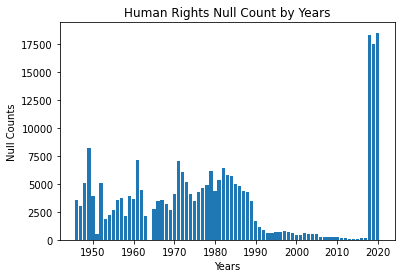

In [28]:
# create distribution plot of how many countries have null values 
plt.bar(hr_null_count_per_year.keys(), hr_null_count_per_year.values())
plt.title('Human Rights Null Count by Years')
plt.xlabel('Years')
plt.ylabel('Null Counts')

# x is years 
# y is count of coutrnies that have null values in HR 